# Question:
julian asked:
Is there a solution / answer code available for the week 5 additional exercise

# Answer:
The general plan in pseudo code was:

for each cluster
    grab all points in the cluster
    plot the comparison between the cluster means vs. population means
    look for insights

Cluster 1


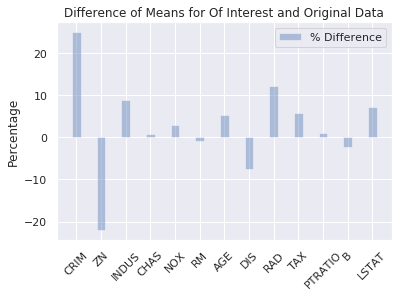

Cluster 2


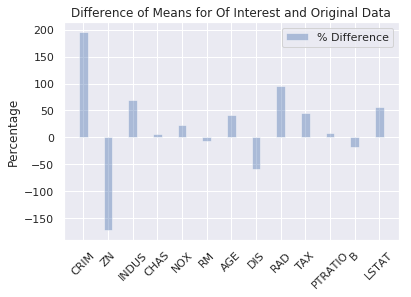

Cluster 3


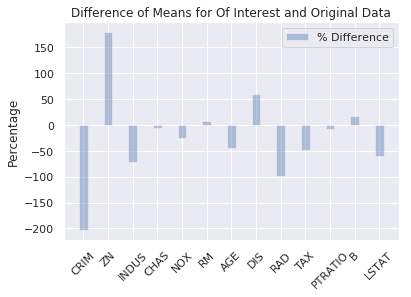

Cluster 4


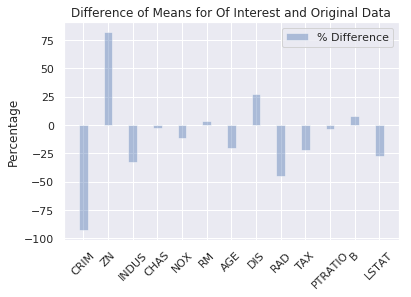

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline


def norm_data(X):
    mu = X.mean(axis=0)
    sd = X.std(axis=0)
    X_norm = (X - mu) / sd

    return X_norm


def pca_transform(n, data, inv=False):
    pca = PCA(n_components=n, random_state=0)
    data_norm = norm_data(data)
    Z = pca.fit_transform(data_norm)
    if inv:
        Z = pca.inverse_transform(Z)*data.std(axis=0) + data.mean(axis=0)

    return Z


def plot_PCs(n, data, y, km=False):

    Z = pca_transform(n, data)

    if km:
        kmeans = KMeans(4)
        kmeans.fit(Z)
        cl = kmeans.labels_

    # split data by MEDV > mean
    gt = Z[y == 1]
    lt = Z[y == 0]

    # 3D K-Means
    if km and n == 3:
        ax = plt.subplot(projection='3d')
        ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2], c=cl,  cmap="Accent")

        ax = plt.gca()
        ax.set_zlabel("3rd PC")
        plt.xlabel("1st PC")
        plt.ylabel("2nd PC")

    # 3D MEDV split
    elif n == 3:
        ax = plt.subplot(projection='3d')
        ax.scatter3D(gt[:, 0], gt[:, 1], gt[:, 2], marker='+', cmap="Accent",
                     label="Greater than mean MEDV")
        ax.scatter3D(lt[:, 0], lt[:, 1], lt[:, 2], s=5, marker='o',
                     cmap="Accent", label="Less than mean MEDV")

        ax = plt.gca()
        ax.set_zlabel("3rd PC")
        plt.xlabel("1st PC")
        plt.ylabel("2nd PC")

    # 2D K-Means
    if km and n == 2:
        plt.scatter(Z[:, 0], Z[:, 1], c=cl,  cmap="Accent")

        plt.xlabel("1st PC")
        plt.ylabel("2nd PC")
    # 2D MEDV split
    elif n == 2:
        plt.scatter(gt[:, 0], gt[:, 1],  marker='+', cmap="Accent",
                    label="Greater than mean MEDV")
        plt.scatter(lt[:, 0], lt[:, 1], s=5, marker='o', cmap="Accent",
                    label="Less than mean MEDV")
        plt.xlabel("1st PC")
        plt.ylabel("2nd PC")

    # 1D K-Means
    if km and n == 1:
        plt.scatter(Z[:, 0], [0]*Z.shape[0], s=5, c=cl, cmap="Accent")

        plt.xlabel("1st PC")
        plt.title("Boston Housing: PCA Reduced")
        ax = plt.gca()
        ax.set(yticks=[])
    # 1D MEDV split
    elif n == 1:
        plt.scatter(gt[:, 0], [0]*gt.shape[0], marker='+', cmap="Accent",
                    label="Greater than mean MEDV")
        plt.scatter(lt[:, 0], [0]*lt.shape[0], s=5, marker='o', cmap="Accent",
                    label="Less than mean MEDV")

        plt.xlabel("1st PC")
        plt.title("Boston Housing: PCA Reduced")
        ax = plt.gca()
        ax.set(yticks=[])

    if not km:
        plt.legend()
    if km:
        plt.title("Boston Housing: PCA and K-Means")
    else:
        plt.title("Boston Housing: PCA Reduced")
    plt.show()


def plot_diff_means(d1, d2, labels):
    fig, ax = plt.subplots()
    bar_width = 0.35
    opacity = 0.4
    index = np.arange(d1.shape[1])
    mean1 = d1.mean(axis=0)
    mean2 = d2.mean(axis=0)
    diff = 100*(mean1 - mean2) / mean2

    ax.bar(index, diff, bar_width,
           alpha=opacity, color='b',
           label="% Difference")

    plt.xticks(index, labels, rotation=45)
    plt.ylabel("Percentage")
    plt.title("Difference of Means for Of Interest and Original Data")
    plt.legend()

    plt.show()



data = load_boston().data
target = load_boston().target
y = np.zeros_like(target)
y[target > target.mean()] = 1

# cut our data down to 1D with 1st PC
Z = pca_transform(1, data)
# create 4 clusters for Z
kmeans = KMeans(n_clusters=4, random_state=0).fit(Z)
labels = kmeans.labels_

for i in range(4):
    # min and max value for each cluster
    lower = Z[labels == i].min()
    upper = Z[labels == i].max()

    # grab the indices of Z corresponding to cluster i
    ind = []
    for u, v in enumerate(Z):
        if v > lower and v < upper:
            ind.append(u)

    # transform our data from 1D --> 13D, which matches our original shape
    Z_recovered = pca_transform(1, data, inv=True)

    bar_labels = load_boston().feature_names
    print(f"Cluster {i+1}")
    plot_diff_means(Z_recovered[ind], data, bar_labels)